In [1]:
#Importe de las librerías a usar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from datetime import date
import seaborn as sns

In [2]:
#lectura del archivo total_victimas.xlsx y conversión de la hoja HECHOS a dataframe
archivo = 'total_victimas.xlsx'

df_victimas = pd.read_excel(archivo)

df_victimas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     664 non-null    object        
 1   FECHA                  664 non-null    datetime64[ns]
 2   AAAA                   664 non-null    int64         
 3   MM                     664 non-null    int64         
 4   DD                     664 non-null    int64         
 5   ROL                    664 non-null    object        
 6   VICTIMA                664 non-null    object        
 7   SEXO                   664 non-null    object        
 8   EDAD                   664 non-null    int64         
 9   FECHA_FALLECIMIENTO    664 non-null    object        
 10  N_VICTIMAS             664 non-null    int64         
 11  HORA                   664 non-null    object        
 12  HH                     664 non-null    object        
 13  TIPO_

In [4]:
df_victimas['AAAA'].value_counts()

AAAA
2018    141
2017    133
2016    130
2021     93
2019     92
2020     75
Name: count, dtype: int64

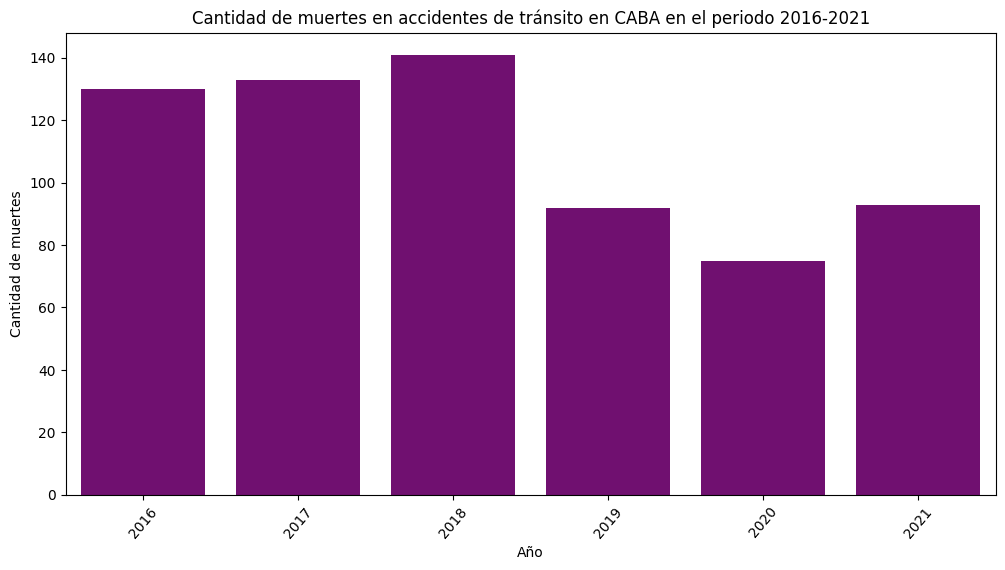

In [9]:
#Identificar la cantidad de victimas mortales en accidentes de tránsito por año en el periodo investigado
victimas_año = df_victimas['AAAA'].value_counts().sort_index()
# Se ajusta el tamaño del gráfico
plt.figure(figsize=(12, 6))  

# Definición de los parámetors para Graficar los datos
sns.barplot(x=victimas_año.index, y=victimas_año.values, color='purple')
plt.xticks(rotation=50)

plt.xlabel('Año')
plt.ylabel('Cantidad de muertes')
plt.title('Cantidad de muertes en accidentes de tránsito en CABA en el periodo 2016-2021')
#Se guarda en el PC la gráfica
plt.savefig('muertes_año.png')

plt.show()


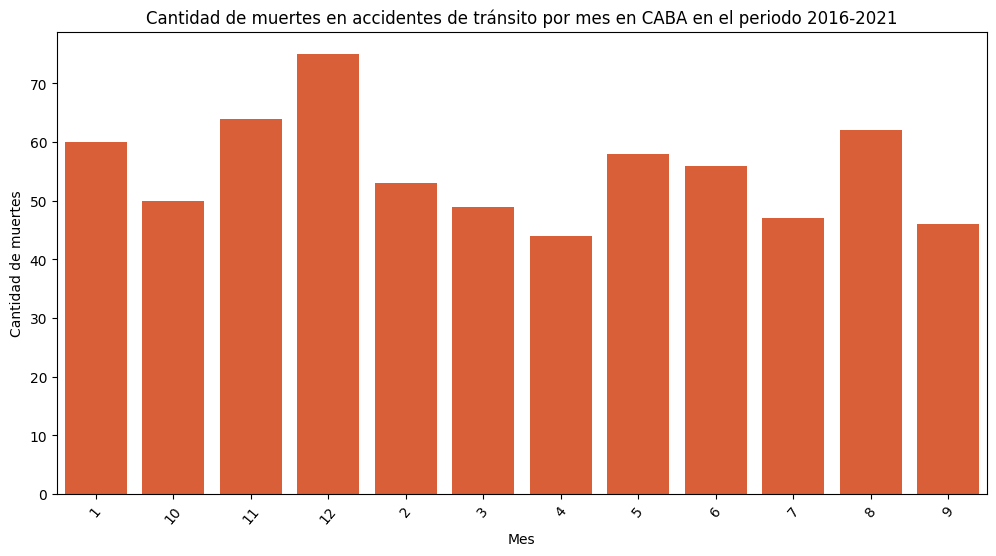

In [65]:
#Indentificar la cantidad de victimas mortales en accidentes de tránsito por mes durante el periodo investigado
victimas_mes = df_victimas['MM'].value_counts().sort_index()
# Se ajusta el tamaño del gráfico
plt.figure(figsize=(12, 6))  

# Graficar los datos
sns.barplot(x=victimas_mes.index, y=victimas_mes.values, color='#F4511E')
plt.xticks(rotation=50)

plt.xlabel('Mes')
plt.ylabel('Cantidad de muertes')
plt.title('Cantidad de muertes en accidentes de tránsito por mes en CABA en el periodo 2016-2021')
plt.savefig('muertes_mes.png')

plt.show()


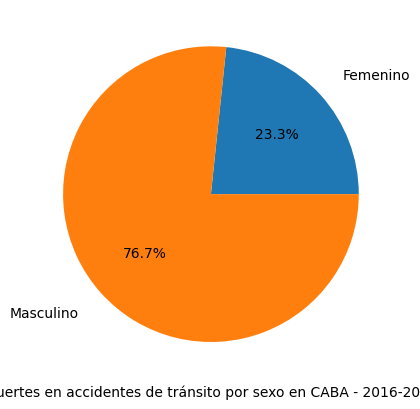

In [7]:
#Indentificar la cantidad de victimas mortales en accidentes de tránsito por sexo
victimas_sexo = df_victimas['SEXO'].value_counts().sort_index()
name='Femenino','Masculino'

# Graficar los datos
plt.pie(victimas_sexo, labels=name, labeldistance=1.2,autopct="%1.1f%%")
plt.xlabel("Muertes en accidentes de tránsito por sexo en CABA - 2016-2021")
plt.savefig("muertes_sexo.png")
plt.show()

In [3]:
#Cambio de formato de algunas variables de interés
df_victimas['EDAD'] = df_victimas['EDAD'].astype(int).astype(float)
df_victimas['AAAA'] = df_victimas['AAAA'].astype(int).astype(str)
df_victimas['MM'] = df_victimas['MM'].astype(int).astype(str)
df_victimas['DD'] = df_victimas['DD'].astype(int).astype(str)
df_victimas['COMUNA'] = df_victimas['COMUNA'].astype(int).astype(str)
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     664 non-null    object        
 1   FECHA                  664 non-null    datetime64[ns]
 2   AAAA                   664 non-null    object        
 3   MM                     664 non-null    object        
 4   DD                     664 non-null    object        
 5   ROL                    664 non-null    object        
 6   VICTIMA                664 non-null    object        
 7   SEXO                   664 non-null    object        
 8   EDAD                   664 non-null    float64       
 9   FECHA_FALLECIMIENTO    664 non-null    object        
 10  N_VICTIMAS             664 non-null    int64         
 11  HORA                   664 non-null    object        
 12  HH                     664 non-null    object        
 13  TIPO_

In [23]:
df_victimas.head(10)

,ID,FECHA,AAAA,MM,DD,HORA,HH,SEXO,EDAD,FECHA_FALLECIMIENTO,N_VICTIMAS,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,ROL,VICTIMA,PARTICIPANTES,ACUSADO
0,2017-0112,2017-09-10,2017,9,10,09:32:17,9,MASCULINO,1.0,SD,1,AUTOPISTA,AUTOPISTA 25 DE MAYO y VARELA AV.,7,PASAJERO_ACOMPAÑANTE,AUTO,AUTO-OBJETO FIJO,OBJETO FIJO
1,2018-0103,2018-09-27,2018,9,27,17:51:00,17,MASCULINO,1.0,2018-09-29 00:00:00,1,AVENIDA,"CASTAÑARES AV. y BONORINO, ESTEBAN, CNEL. AV.",7,PEATON,PEATON,PEATON-MOTO,MOTO
2,2017-0013,2017-01-27,2017,1,27,07:00:00,7,MASCULINO,4.0,2017-01-27 00:00:00,1,AVENIDA,"IRIARTE, GRAL. AV. 3055",4,PEATON,PEATON,PEATON-CARGAS,CARGAS
3,2020-0071,2020-12-17,2020,12,17,23:00:00,23,MASCULINO,4.0,2020-12-17 00:00:00,1,AVENIDA,SAN PEDRITO AV. y DIRECTORIO AV.,7,PEATON,PEATON,PEATON-AUTO,AUTO
4,2021-0024,2021-03-03,2021,3,3,16:30:00,16,MASCULINO,5.0,2021-03-03 00:00:00,1,AVENIDA,"PERON, EVA AV. y PIEDRA BUENA AV.",9,CICLISTA,BICICLETA,BICICLETA-CARGAS,CARGAS
5,2016-0178,2016-12-30,2016,12,30,16:18:00,16,FEMENINO,7.0,SD,1,CALLE,REPUBLICA BOLIVARIANA DE VENEZUELA y SAAVEDRA,3,PEATON,PEATON,MULTIPLE,MULTIPLE
6,2017-0066,2017-05-22,2017,5,22,18:10:00,18,MASCULINO,10.0,2017-05-22 00:00:00,1,AVENIDA,SAN MARTIN AV. y FRAGATA PRES. SARMIENTO,15,PEATON,PEATON,PEATON-PASAJEROS,PASAJEROS
7,2017-0108,2017-09-02,2017,9,2,04:53:08,4,MASCULINO,10.0,2017-09-02 00:00:00,1,GRAL PAZ,"PAZ, GRAL. AV. y MACHAIN",12,PASAJERO_ACOMPAÑANTE,AUTO,AUTO-OBJETO FIJO,AUTO
8,2018-0046,2018-05-02,2018,5,2,03:15:00,3,MASCULINO,11.0,2018-05-02 00:00:00,1,GRAL PAZ,"PAZ, GRAL. AV. y RIVADAVIA AV.",9,PEATON,PEATON,PEATON-AUTO,AUTO
9,2019-0006,2019-01-23,2019,1,23,05:45:00,5,FEMENINO,12.0,2019-01-23 00:00:00,1,AVENIDA,"OBLIGADO RAFAEL, AV.COSTANERA 4650",14,PEATON,PEATON,PEATON-AUTO,AUTO


In [28]:
#Análisis descriptivo de la variable Edad
df_victimas.describe()


,FECHA,EDAD,N_VICTIMAS
count,664,664.000000,664.0
mean,2018-09-16 11:27:28.192771072,42.167169,1.0
min,2016-01-01 00:00:00,1.000000,1.0
25%,2017-04-26 00:00:00,27.000000,1.0
50%,2018-07-02 12:00:00,37.000000,1.0
75%,2020-01-06 12:00:00,56.250000,1.0
max,2021-12-30 00:00:00,95.000000,1.0
std,NaN,19.788034,0.0


In [46]:
#Análisis cruzado entre las victimas por sexo y el rol en el accidente con el causante de la muerte, promedio de edad
pd.pivot_table(df_victimas, values='EDAD', index=['SEXO', 'ROL'], columns=['VICTIMA'],aggfunc="mean")

VICTIMA                              AUTO  BICICLETA     CARGAS       MOTO   
SEXO      ROL                                                                
FEMENINO  CICLISTA                    NaN  47.285714        NaN        NaN  \
          CONDUCTOR             48.800000        NaN        NaN  36.933333   
          PASAJERO_ACOMPAÑANTE  39.200000        NaN        NaN  24.666667   
          PEATON                      NaN        NaN        NaN        NaN   
          SD                          NaN        NaN        NaN  33.000000   
MASCULINO CICLISTA                    NaN  37.142857        NaN        NaN   
          CONDUCTOR             41.344828        NaN  39.333333  32.558442   
          PASAJERO_ACOMPAÑANTE  35.294118        NaN  41.750000  27.187500   
          PEATON                      NaN        NaN        NaN        NaN   
          SD                          NaN        NaN        NaN        NaN   

VICTIMA                         MOVIL  PASAJEROS     PEATON    SD  
SEXO      ROL                                                      
FEMENINO  CICLISTA                NaN        NaN        NaN   NaN  
          CONDUCTOR               NaN        NaN        NaN   NaN  
          PASAJERO_ACOMPAÑANTE    NaN  73.666667        NaN   NaN  
          PEATON                  NaN        NaN  58.843750   NaN  
          SD                      NaN        NaN        NaN   NaN  
MASCULINO CICLISTA                NaN        NaN        NaN   NaN  
          CONDUCTOR              24.0        NaN        NaN   NaN  
          PASAJERO_ACOMPAÑANTE   42.5  44.000000        NaN   NaN  
          PEATON                  NaN        NaN  51.302013   NaN  
          SD                      NaN        NaN        NaN  54.2

In [38]:
#Análisis cruzado entre las victimas por sexo y el rol en el accidente con el causante de la muerte
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['SEXO', 'ROL'], columns=['VICTIMA'],aggfunc="sum")


VICTIMA                         AUTO  BICICLETA  CARGAS   MOTO  MOVIL   
SEXO      ROL                                                           
FEMENINO  CICLISTA               NaN        7.0     NaN    NaN    NaN  \
          CONDUCTOR              5.0        NaN     NaN   15.0    NaN   
          PASAJERO_ACOMPAÑANTE  10.0        NaN     NaN   18.0    NaN   
          PEATON                 NaN        NaN     NaN    NaN    NaN   
          SD                     NaN        NaN     NaN    1.0    NaN   
MASCULINO CICLISTA               NaN       21.0     NaN    NaN    NaN   
          CONDUCTOR             58.0        NaN     3.0  231.0    1.0   
          PASAJERO_ACOMPAÑANTE  17.0        NaN     4.0   16.0    2.0   
          PEATON                 NaN        NaN     NaN    NaN    NaN   
          SD                     NaN        NaN     NaN    NaN    NaN   

VICTIMA                         PASAJEROS  PEATON   SD  
SEXO      ROL                                           
FEMENINO  CICLISTA                    NaN     NaN  NaN  
          CONDUCTOR                   NaN     NaN  NaN  
          PASAJERO_ACOMPAÑANTE        3.0     NaN  NaN  
          PEATON                      NaN    96.0  NaN  
          SD                          NaN     NaN  NaN  
MASCULINO CICLISTA                    NaN     NaN  NaN  
          CONDUCTOR                   NaN     NaN  NaN  
          PASAJERO_ACOMPAÑANTE        2.0     NaN  NaN  
          PEATON                      NaN   149.0  NaN  
          SD                          NaN     NaN  5.0

In [47]:
pd.pivot_table(df_victimas, values='EDAD', index=['SEXO', 'ROL'], columns=['ACUSADO'],aggfunc="mean")

ACUSADO                              AUTO  BICICLETA     CARGAS       MOTO   
SEXO      ROL                                                                
FEMENINO  CICLISTA              76.000000        NaN  46.000000        NaN  \
          CONDUCTOR             44.750000        NaN  35.500000        NaN   
          PASAJERO_ACOMPAÑANTE  32.538462        NaN  24.500000  35.000000   
          PEATON                54.230769       78.0  62.133333  60.285714   
          SD                    33.000000        NaN        NaN        NaN   
MASCULINO CICLISTA              53.142857        NaN  27.400000        NaN   
          CONDUCTOR             34.692308       29.5  34.000000  33.550000   
          PASAJERO_ACOMPAÑANTE  34.272727        NaN  36.750000  24.333333   
          PEATON                44.045455       58.0  56.631579  60.562500   
          SD                    28.500000        NaN        NaN  77.000000   

ACUSADO                          MULTIPLE  OBJETO FIJO  OTRO  PASAJEROS    SD   
SEXO      ROL                                                                   
FEMENINO  CICLISTA                    NaN          NaN   NaN  35.500000   NaN  \
          CONDUCTOR                   NaN    53.000000  35.0  52.500000   NaN   
          PASAJERO_ACOMPAÑANTE  41.000000    28.000000   NaN  46.200000   NaN   
          PEATON                42.000000          NaN   NaN  60.911765  32.0   
          SD                          NaN          NaN   NaN        NaN   NaN   
MASCULINO CICLISTA              37.000000          NaN  16.0  33.000000   NaN   
          CONDUCTOR             37.857143    32.217391  45.5  35.727273  35.0   
          PASAJERO_ACOMPAÑANTE        NaN    29.777778   NaN  32.777778  68.0   
          PEATON                41.500000          NaN   NaN  52.830769  43.0   
          SD                          NaN          NaN   NaN        NaN  68.5   

ACUSADO                         TREN  
SEXO      ROL                         
FEMENINO  CICLISTA               NaN  
          CONDUCTOR              NaN  
          PASAJERO_ACOMPAÑANTE   NaN  
          PEATON                 NaN  
          SD                     NaN  
MASCULINO CICLISTA              20.0  
          CONDUCTOR              NaN  
          PASAJERO_ACOMPAÑANTE   NaN  
          PEATON                 NaN  
          SD                     NaN

In [40]:
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['SEXO', 'ROL'], columns=['ACUSADO'],aggfunc="sum")

ACUSADO                         AUTO  BICICLETA  CARGAS  MOTO  MULTIPLE   
SEXO      ROL                                                             
FEMENINO  CICLISTA               1.0        NaN     4.0   NaN       NaN  \
          CONDUCTOR              4.0        NaN    12.0   NaN       NaN   
          PASAJERO_ACOMPAÑANTE  13.0        NaN     2.0   1.0       3.0   
          PEATON                26.0        3.0    15.0  14.0       3.0   
          SD                     1.0        NaN     NaN   NaN       NaN   
MASCULINO CICLISTA               7.0        NaN     5.0   NaN       1.0   
          CONDUCTOR             91.0        2.0    71.0  20.0       7.0   
          PASAJERO_ACOMPAÑANTE  11.0        NaN     8.0   3.0       NaN   
          PEATON                44.0        1.0    19.0  16.0       2.0   
          SD                     2.0        NaN     NaN   1.0       NaN   

ACUSADO                         OBJETO FIJO  OTRO  PASAJEROS    SD  TREN  
SEXO      ROL                                                             
FEMENINO  CICLISTA                      NaN   NaN        2.0   NaN   NaN  
          CONDUCTOR                     1.0   1.0        2.0   NaN   NaN  
          PASAJERO_ACOMPAÑANTE          7.0   NaN        5.0   NaN   NaN  
          PEATON                        NaN   NaN       34.0   1.0   NaN  
          SD                            NaN   NaN        NaN   NaN   NaN  
MASCULINO CICLISTA                      NaN   1.0        6.0   NaN   1.0  
          CONDUCTOR                    46.0   2.0       44.0  10.0   NaN  
          PASAJERO_ACOMPAÑANTE          9.0   NaN        9.0   1.0   NaN  
          PEATON                        NaN   NaN       65.0   2.0   NaN  
          SD                            NaN   NaN        NaN   2.0   NaN

In [54]:
#Análisis cruzado entre las victimas por sexo y el rol en el accidente con la vía donde ocurrió el accidente
pd.pivot_table(df_victimas, values='EDAD', index=['SEXO', 'TIPO_DE_CALLE'], columns=['VICTIMA', 'ROL'],aggfunc="mean")

VICTIMA                       AUTO                       BICICLETA    CARGAS   
ROL                      CONDUCTOR PASAJERO_ACOMPAÑANTE   CICLISTA CONDUCTOR   
SEXO      TIPO_DE_CALLE                                                        
FEMENINO  AUTOPISTA      53.000000               23.000        NaN       NaN  \
          AVENIDA        47.750000               40.000  54.500000       NaN   
          CALLE                NaN                  NaN  44.400000       NaN   
          GRAL PAZ             NaN               43.000        NaN       NaN   
MASCULINO AUTOPISTA      36.333333               22.500        NaN      36.5   
          AVENIDA        37.545455               32.625  37.066667       NaN   
          CALLE          52.666667               65.000  37.333333       NaN   
          GRAL PAZ       46.700000               32.800        NaN      45.0   

VICTIMA                                            MOTO                        
ROL                     PASAJERO_ACOMPAÑANTE  CONDUCTOR PASAJERO_ACOMPAÑANTE   
SEXO      TIPO_DE_CALLE                                                        
FEMENINO  AUTOPISTA                      NaN  29.000000            29.666667  \
          AVENIDA                        NaN  38.400000            24.090909   
          CALLE                          NaN  44.000000            16.000000   
          GRAL PAZ                       NaN  26.500000            24.666667   
MASCULINO AUTOPISTA                      NaN  30.375000            16.000000   
          AVENIDA                       37.0  32.373134            29.000000   
          CALLE                         61.0  34.350000            27.666667   
          GRAL PAZ                      32.0  33.480000            21.000000   

VICTIMA                           MOVIL                        
ROL                        SD CONDUCTOR PASAJERO_ACOMPAÑANTE   
SEXO      TIPO_DE_CALLE                                        
FEMENINO  AUTOPISTA       NaN       NaN                  NaN  \
          AVENIDA        33.0       NaN                  NaN   
          CALLE           NaN       NaN                  NaN   
          GRAL PAZ        NaN       NaN                  NaN   
MASCULINO AUTOPISTA       NaN       NaN                  NaN   
          AVENIDA         NaN      24.0                 42.5   
          CALLE           NaN       NaN                  NaN   
          GRAL PAZ        NaN       NaN                  NaN   

VICTIMA                            PASAJEROS     PEATON         SD  
ROL                     PASAJERO_ACOMPAÑANTE     PEATON         SD  
SEXO      TIPO_DE_CALLE                                             
FEMENINO  AUTOPISTA                      NaN  29.000000        NaN  
          AVENIDA                       71.0  58.194030        NaN  
          CALLE                         79.0  62.000000        NaN  
          GRAL PAZ                       NaN  47.000000        NaN  
MASCULINO AUTOPISTA                      NaN  45.500000        NaN  
          AVENIDA                       44.0  53.694444  77.000000  
          CALLE                          NaN  46.160000  42.333333  
          GRAL PAZ                       NaN  40.875000  67.000000

In [55]:
#Análisis cruzado entre las victimas por sexo y el rol en el accidente con la vía donde ocurrióm el accidente
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['SEXO', 'TIPO_DE_CALLE'], columns=['VICTIMA','ROL'],aggfunc="sum")

VICTIMA                      AUTO                      BICICLETA    CARGAS   
ROL                     CONDUCTOR PASAJERO_ACOMPAÑANTE  CICLISTA CONDUCTOR   
SEXO      TIPO_DE_CALLE                                                      
FEMENINO  AUTOPISTA           1.0                  1.0       NaN       NaN  \
          AVENIDA             4.0                  6.0       2.0       NaN   
          CALLE               NaN                  NaN       5.0       NaN   
          GRAL PAZ            NaN                  3.0       NaN       NaN   
MASCULINO AUTOPISTA           6.0                  2.0       NaN       2.0   
          AVENIDA            33.0                  8.0      15.0       NaN   
          CALLE               9.0                  2.0       6.0       NaN   
          GRAL PAZ           10.0                  5.0       NaN       1.0   

VICTIMA                                           MOTO                        
ROL                     PASAJERO_ACOMPAÑANTE CONDUCTOR PASAJERO_ACOMPAÑANTE   
SEXO      TIPO_DE_CALLE                                                       
FEMENINO  AUTOPISTA                      NaN       1.0                  3.0  \
          AVENIDA                        NaN      10.0                 11.0   
          CALLE                          NaN       2.0                  1.0   
          GRAL PAZ                       NaN       2.0                  3.0   
MASCULINO AUTOPISTA                      NaN      32.0                  1.0   
          AVENIDA                        2.0     134.0                  8.0   
          CALLE                          1.0      40.0                  6.0   
          GRAL PAZ                       1.0      25.0                  1.0   

VICTIMA                          MOVIL                        
ROL                       SD CONDUCTOR PASAJERO_ACOMPAÑANTE   
SEXO      TIPO_DE_CALLE                                       
FEMENINO  AUTOPISTA      NaN       NaN                  NaN  \
          AVENIDA        1.0       NaN                  NaN   
          CALLE          NaN       NaN                  NaN   
          GRAL PAZ       NaN       NaN                  NaN   
MASCULINO AUTOPISTA      NaN       NaN                  NaN   
          AVENIDA        NaN       1.0                  2.0   
          CALLE          NaN       NaN                  NaN   
          GRAL PAZ       NaN       NaN                  NaN   

VICTIMA                            PASAJEROS PEATON   SD  
ROL                     PASAJERO_ACOMPAÑANTE PEATON   SD  
SEXO      TIPO_DE_CALLE                                   
FEMENINO  AUTOPISTA                      NaN    1.0  NaN  
          AVENIDA                        2.0   67.0  NaN  
          CALLE                          1.0   27.0  NaN  
          GRAL PAZ                       NaN    1.0  NaN  
MASCULINO AUTOPISTA                      NaN    8.0  NaN  
          AVENIDA                        2.0  108.0  1.0  
          CALLE                          NaN   25.0  3.0  
          GRAL PAZ                       NaN    8.0  1.0

In [56]:
#Análisis cruzado entre las victimas por sexo y el rol en el accidente con la comuna donde ocurrióm el accidente
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['SEXO', 'COMUNA'], columns=['VICTIMA','ROL'],aggfunc="sum")

VICTIMA               AUTO                      BICICLETA    CARGAS   
ROL              CONDUCTOR PASAJERO_ACOMPAÑANTE  CICLISTA CONDUCTOR   
SEXO      COMUNA                                                      
FEMENINO  1            NaN                  NaN       1.0       NaN  \
          10           1.0                  NaN       1.0       NaN   
          11           NaN                  NaN       NaN       NaN   
          12           NaN                  NaN       NaN       NaN   
          13           1.0                  NaN       1.0       NaN   
          14           NaN                  NaN       1.0       NaN   
          15           NaN                  NaN       NaN       NaN   
          2            NaN                  NaN       1.0       NaN   
          3            NaN                  1.0       NaN       NaN   
          4            NaN                  1.0       NaN       NaN   
          5            NaN                  NaN       NaN       NaN   
          6            NaN                  NaN       1.0       NaN   
          7            NaN                  1.0       1.0       NaN   
          8            1.0                  3.0       NaN       NaN   
          9            2.0                  4.0       NaN       NaN   
MASCULINO 1            3.0                  2.0       2.0       NaN   
          10           2.0                  1.0       1.0       NaN   
          11           3.0                  NaN       1.0       1.0   
          12           3.0                  2.0       1.0       NaN   
          13           3.0                  NaN       NaN       NaN   
          14           3.0                  NaN       1.0       NaN   
          15           2.0                  1.0       NaN       NaN   
          2            2.0                  NaN       2.0       NaN   
          3            3.0                  2.0       3.0       NaN   
          4            4.0                  1.0       5.0       NaN   
          5            1.0                  NaN       NaN       NaN   
          6            2.0                  NaN       NaN       NaN   
          7            7.0                  2.0       1.0       NaN   
          8            8.0                  4.0       1.0       NaN   
          9           12.0                  2.0       3.0       2.0   

VICTIMA                                    MOTO                             
ROL              PASAJERO_ACOMPAÑANTE CONDUCTOR PASAJERO_ACOMPAÑANTE   SD   
SEXO      COMUNA                                                            
FEMENINO  1                       NaN       1.0                  NaN  1.0  \
          10                      NaN       1.0                  1.0  NaN   
          11                      NaN       NaN                  NaN  NaN   
          12                      NaN       1.0                  2.0  NaN   
          13                      NaN       NaN                  1.0  NaN   
          14                      NaN       2.0                  2.0  NaN   
          15                      NaN       2.0                  2.0  NaN   
          2                       NaN       NaN                  NaN  NaN   
          3                       NaN       1.0                  2.0  NaN   
          4                       NaN       1.0                  3.0  NaN   
          5                       NaN       NaN                  NaN  NaN   
          6                       NaN       1.0                  NaN  NaN   
          7                       NaN       2.0                  1.0  NaN   
          8                       NaN       1.0                  2.0  NaN   
          9                       NaN       2.0                  2.0  NaN   
MASCULINO 1                       1.0      27.0                  3.0  NaN   
          10                      NaN      13.0                  NaN  NaN   
          11                      NaN      17.0                  2.0  NaN   
          12                      1.0  

In [57]:
#Análisis cruzado entre las victimas por sexo y el rol en el accidente con la comuna donde ocurrióm el accidente
pd.pivot_table(df_victimas, values='EDAD', index=['SEXO', 'COMUNA'], columns=['VICTIMA','ROL'],aggfunc="mean")

VICTIMA                AUTO                       BICICLETA    CARGAS   
ROL               CONDUCTOR PASAJERO_ACOMPAÑANTE   CICLISTA CONDUCTOR   
SEXO      COMUNA                                                        
FEMENINO  1             NaN                  NaN  26.000000       NaN  \
          10      78.000000                  NaN  56.000000       NaN   
          11            NaN                  NaN        NaN       NaN   
          12            NaN                  NaN        NaN       NaN   
          13      51.000000                  NaN  33.000000       NaN   
          14            NaN                  NaN  55.000000       NaN   
          15            NaN                  NaN        NaN       NaN   
          2             NaN                  NaN  76.000000       NaN   
          3             NaN                44.00        NaN       NaN   
          4             NaN                23.00        NaN       NaN   
          5             NaN                  NaN        NaN       NaN   
          6             NaN                  NaN  45.000000       NaN   
          7             NaN                31.00  40.000000       NaN   
          8       35.000000                35.00        NaN       NaN   
          9       40.000000                47.25        NaN       NaN   
MASCULINO 1       44.333333                31.00  36.500000       NaN   
          10      29.500000                60.00  20.000000       NaN   
          11      33.000000                  NaN  16.000000      45.0   
          12      29.000000                13.50  44.000000       NaN   
          13      45.000000                  NaN        NaN       NaN   
          14      51.000000                  NaN  28.000000       NaN   
          15      26.000000                20.00        NaN       NaN   
          2       36.000000                  NaN  28.500000       NaN   
          3       36.666667                50.00  44.333333       NaN   
          4       41.250000                27.00  39.200000       NaN   
          5       33.000000                  NaN        NaN       NaN   
          6       39.000000                  NaN        NaN       NaN   
          7       31.285714                17.50  26.000000       NaN   
          8       44.125000                44.00  47.000000       NaN   
          9       54.166667                46.50  46.666667      36.5   

VICTIMA                                     MOTO                              
ROL              PASAJERO_ACOMPAÑANTE  CONDUCTOR PASAJERO_ACOMPAÑANTE    SD   
SEXO      COMUNA                                                              
FEMENINO  1                       NaN  32.000000                  NaN  33.0  \
          10                      NaN  42.000000            23.000000   NaN   
          11                      NaN        NaN                  NaN   NaN   
          12                      NaN  19.000000            25.500000   NaN   
          13                      NaN        NaN            26.000000   NaN   
          14                      NaN  52.000000            29.000000   NaN   
          15                      NaN  29.000000            22.000000   NaN   
          2                       NaN        NaN                  NaN   NaN   
          3                       NaN  43.000000            19.000000   NaN   
          4                       NaN  29.000000            23.666667   NaN   
          5                       NaN        NaN                  NaN   NaN   
          6                       NaN  31.000000                  NaN   NaN   
          7                       NaN  49.000000            18.000000   NaN   
          8                       NaN  34.000000            24.500000   NaN   
          9                       NaN  32.000000            33.000000   NaN   
MASCULINO 1                      61.0  31.444444            31.666667   NaN   
          10                      NaN  33.000000                  NaN   NaN   
          

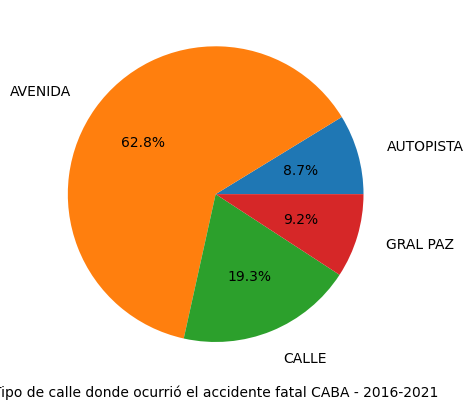

In [51]:
#Indentificar la cantidad de victimas mortales en accidentes de tránsito por sexo
victimas_calle = df_victimas['TIPO_DE_CALLE'].value_counts().sort_index()
name='AUTOPISTA','AVENIDA','CALLE','GRAL PAZ'

# Graficar los datos
plt.pie(victimas_calle, labels=name, labeldistance=1.2,autopct="%1.1f%%")
plt.xlabel("Tipo de calle donde ocurrió el accidente fatal CABA - 2016-2021")
plt.savefig("muertes_calle.png")
plt.show()

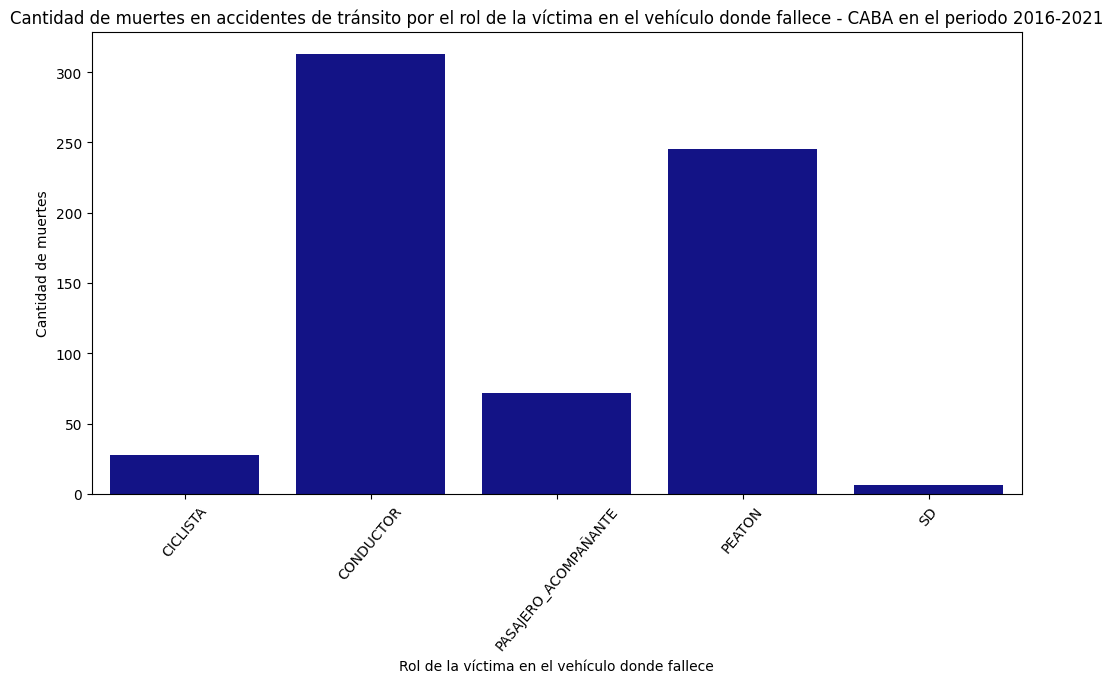

In [64]:
#Indentificar la cantidad de victimas mortales en accidentes de tránsito por el rol en el vehículo en el que fallece
victimas_rol = df_victimas['ROL'].value_counts().sort_index()
# Se ajusta el tamaño del gráfico
plt.figure(figsize=(12, 6))  

# Graficar los datos
sns.barplot(x=victimas_rol.index, y=victimas_rol.values, color='#000099')
plt.xticks(rotation=50)

plt.xlabel('Rol de la víctima en el vehículo donde fallece')
plt.ylabel('Cantidad de muertes')
plt.title('Cantidad de muertes en accidentes de tránsito por el rol de la víctima en el vehículo donde fallece - CABA en el periodo 2016-2021')
plt.savefig('muertes_rol.png')

plt.show()

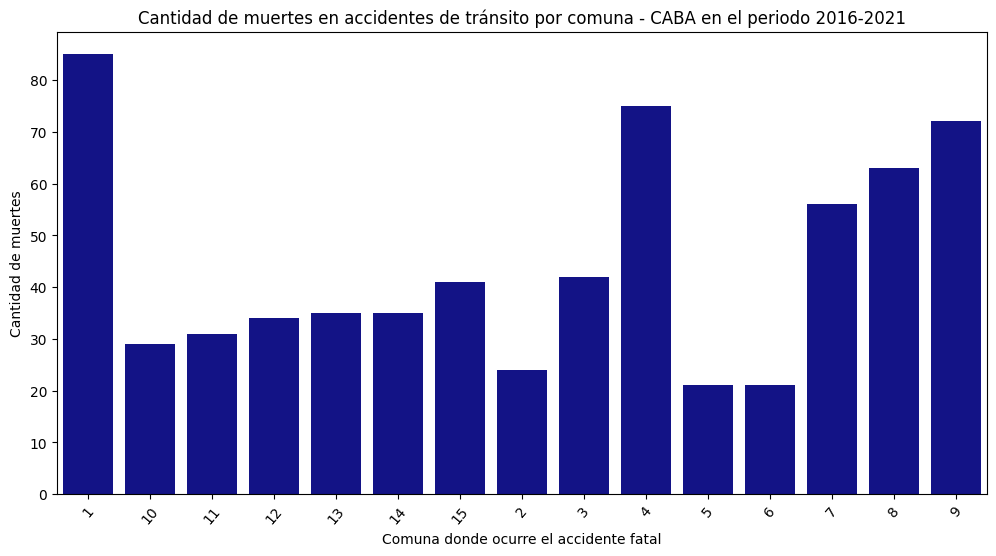

In [63]:
#Indentificar la cantidad de victimas mortales en accidentes de tránsito por el rol en el vehículo en el que fallece
victimas_comuna = df_victimas['COMUNA'].value_counts().sort_index()
# Se ajusta el tamaño del gráfico
plt.figure(figsize=(12, 6))  

# Graficar los datos
sns.barplot(x=victimas_comuna.index, y=victimas_comuna.values, color='#000099')
plt.xticks(rotation=50)

plt.xlabel('Comuna donde ocurre el accidente fatal')
plt.ylabel('Cantidad de muertes')
plt.title('Cantidad de muertes en accidentes de tránsito por comuna - CABA en el periodo 2016-2021')
plt.savefig('muertes_comuna.png')

# Invertir el eje Y con el eje X
#plt.gca().invert_xaxis()  

# Mostrar el gráfico
plt.show()

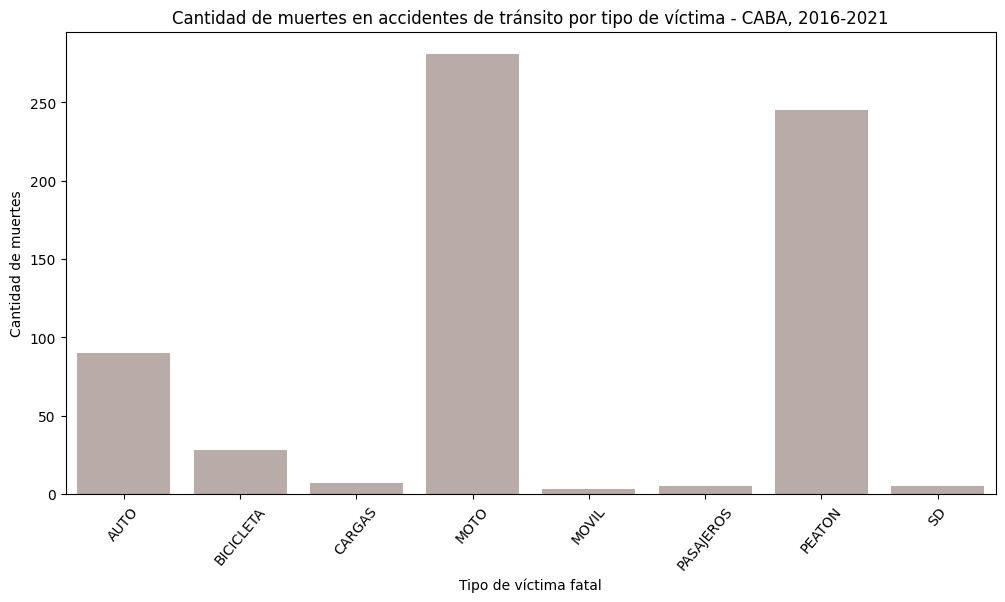

In [74]:
#Indentificar la cantidad de victimas mortales en accidentes de tránsito por el rol en el vehículo en el que fallece
victimas = df_victimas['VICTIMA'].value_counts().sort_index()
# Se ajusta el tamaño del gráfico
plt.figure(figsize=(12, 6))  

# Graficar los datos
sns.barplot(x=victimas.index, y=victimas.values, color='#BCAAA4')
plt.xticks(rotation=50)

plt.xlabel('Tipo de víctima fatal')
plt.ylabel('Cantidad de muertes')
plt.title('Cantidad de muertes en accidentes de tránsito por tipo de víctima - CABA, 2016-2021')
plt.savefig('muertes_comuna.png')

# Invertir el eje Y con el eje X
#plt.gca().invert_xaxis()  

# Mostrar el gráfico
plt.show()

In [ ]:
df2 = pd.df_victimas(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df2.plot.bar()